In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [69]:
# import the test and prediction data 
preds = pd.read_csv('predictions.csv', index_col=0)   

In [70]:
preds

,Labels,Predictions
Galaxy Index,,
97154,3,3
39402,2,3
43155,2,2
57809,1,1
53178,2,2
...,...,...
62707,2,2
94177,1,1
33968,2,2


In [71]:
# import flagged galaxies

flagged = pd.read_csv('flagged.csv', index_col=0)

In [73]:
# add column of 1s to flagged galaxies
flagged['flagged'] = 1

In [74]:
flagged

,propflaggeddiff,totalneighs,flagged
5,9,26,1
18,3,26,1
25,1,26,1
35,12,26,1
37,2,26,1
...,...,...,...
97215,7,26,1
97218,8,26,1
97222,14,26,1
97223,12,26,1


In [75]:
# merge the two dataframes on the galaxy ID and for galaxies unflagged, put a None in the propflaggeddiff and totalneighs columns

merged = pd.merge(preds, flagged, how='left', left_index=True, right_index=True)

In [48]:
merged

,Labels,Predictions,propflaggeddiff,totalneighs,flagged
Galaxy Index,,,,,
97154,3,3,5.0,26.0,1.0
39402,2,3,NaN,NaN,NaN
43155,2,1,NaN,NaN,NaN
57809,1,1,NaN,NaN,NaN
53178,2,1,NaN,NaN,NaN
...,...,...,...,...,...
62707,2,1,NaN,NaN,NaN
94177,1,1,NaN,NaN,NaN
33968,2,1,7.0,26.0,1.0


In [76]:
# remove flagged galaxies from the dataframe

pure = merged[merged['flagged'] != 1]
pure.drop(['flagged', 'propflaggeddiff', 'totalneighs'], axis=1, inplace=True)

/var/folders/r8/krgg76l57s322tmlvzp3l9m40000gn/T/ipykernel_40239/194561993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pure.drop(['flagged', 'propflaggeddiff', 'totalneighs'], axis=1, inplace=True)


In [77]:
pure

,Labels,Predictions
Galaxy Index,,
39402,2,3
43155,2,2
57809,1,1
53178,2,2
79701,1,2
...,...,...
49530,2,1
62707,2,2
94177,1,1


In [85]:
# accuracy of pure and predictions

accuracy_pure = (pure['Labels'] == pure['Predictions']).sum() / len(pure)
accuracy_full = (merged['Labels'] == merged['Predictions']).sum() / len(merged)
accuracy_pure*100, accuracy_full*100

(72.47085677019646, 68.65804725813642)

In [78]:
cm_pure = confusion_matrix(pure['Labels'], pure['Predictions'])
cm_full = confusion_matrix(merged['Labels'], merged['Predictions'])

Text(0.5, 1.0, 'Confusion Matrix for All Galaxies')

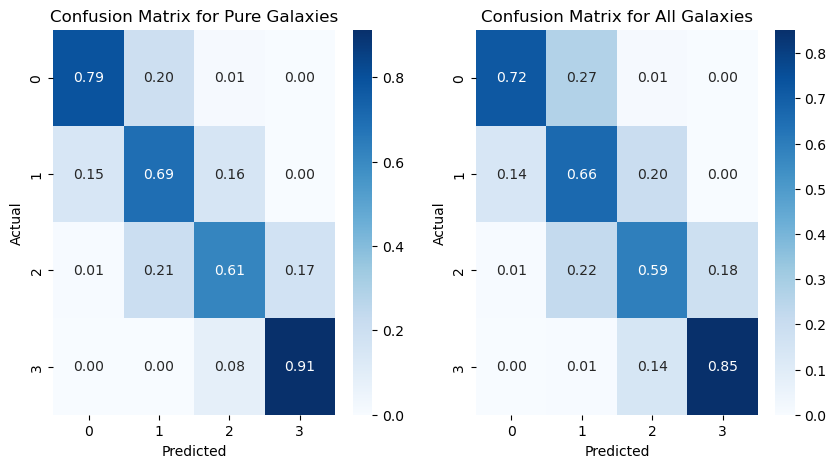

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
cm_pure = cm_pure.astype('float') / cm_pure.sum(axis=1)[:, np.newaxis]
cm_full = cm_full.astype('float') / cm_full.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_full, annot=True, fmt='.2f', cmap='Blues', ax=ax2)
sns.heatmap(cm_pure, annot=True, fmt='.2f', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
ax1.set_title('Confusion Matrix for Pure Galaxies')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title('Confusion Matrix for All Galaxies')

In [45]:
# for each of 0, 1, 2, 3 find the TN, FP, FN, TP and create a new table for each class

# class 0
class0 = merged[merged['Labels'] == 0]
flagged0 = class0[class0['flagged'] == 1]

In [46]:
class0

,Labels,Predictions,propflaggeddiff,totalneighs,flagged
Galaxy Index,,,,,
67608,0,1,5.0,26.0,1.0
52825,0,1,NaN,NaN,NaN
59488,0,1,NaN,NaN,NaN
45858,0,1,4.0,26.0,1.0
49552,0,1,NaN,NaN,NaN
...,...,...,...,...,...
73800,0,1,NaN,NaN,NaN
89236,0,1,3.0,26.0,1.0
90158,0,1,12.0,26.0,1.0


In [47]:
flagged0

,Labels,Predictions,propflaggeddiff,totalneighs,flagged
Galaxy Index,,,,,
67608,0,1,5.0,26.0,1.0
45858,0,1,4.0,26.0,1.0
65048,0,1,12.0,26.0,1.0
66085,0,1,2.0,26.0,1.0
82656,0,1,1.0,26.0,1.0
...,...,...,...,...,...
80953,0,1,8.0,26.0,1.0
87317,0,1,3.0,26.0,1.0
89236,0,1,3.0,26.0,1.0
